In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
data = pd.read_csv(r'D:\Projects\FYP prototype\ver 1.0\GPU\Mergers\base_blender_IM.csv')
data

,chipset,core_clock,boost_clock,memory_clock,memory,memory_ver,bus_width,shaders,TMUs,ROPs,PCIe,TDP,rec_psu,detail_URL,Median Score,Number of Benchmarks
0,GeForce RTX 3060,1320,1777,1875,8.000,6,128,3584,112,48,PCIe 4.0 x16,170,450 W,https://www.techpowerup.com/gpu-specs/geforce-...,2538.63,527
1,GeForce RTX 3060,1320,1867,1875,8.000,6,128,3584,112,48,PCIe 4.0 x16,170,450 W,https://www.techpowerup.com/gpu-specs/geforce-...,2538.63,527
2,GeForce RTX 4070 Ti,2310,2640,1313,12.000,6,192,7680,240,80,PCIe 4.0 x16,285,600 W,https://www.techpowerup.com/gpu-specs/geforce-...,7271.54,377
3,GeForce RTX 4070,1920,2490,1313,12.000,6,192,5888,184,64,PCIe 4.0 x16,200,550 W,https://www.techpowerup.com/gpu-specs/geforce-...,6005.34,408
4,GeForce RTX 4090,2235,2640,1313,24.000,6,384,16384,512,176,PCIe 4.0 x16,450,850 W,https://www.techpowerup.com/gpu-specs/geforce-...,13092.27,1057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Quadro M5000,861,1038,1653,8.000,5,256,2048,128,64,PCIe 3.0 x16,150,450 W,https://www.techpowerup.com/gpu-specs/quadro-m...,330.04,1
124,GeForce GT 640,513,901,792,0.625,3,320,96,24,20,PCIe 1.0 x16,143,300 W,https://www.techpowerup.com/gpu-specs/geforce-...,31.90,2
125,GeForce GT 640,513,513,792,0.625,3,320,96,24,20,PCIe 1.0 x16,143,300 W,https://www.techpowerup.com/gpu-specs/geforce-...,31.90,2
126,GeForce GT 640,513,901,792,0.625,3,320,96,24,20,PCIe 1.0 x16,143,300 W,https://www.techpowerup.com/gpu-specs/geforce-...,31.90,2


In [49]:
from scipy import stats

In [60]:
z_scores = np.abs(stats.zscore(data['Median Score']))
threshold = 3  # Typically, a threshold of 3 is used
data = data[z_scores < threshold]


In [61]:
#CSV file has columns 'X' and 'y' for features and target
X = data[['boost_clock', 'memory', 'memory_ver', 'bus_width', 'shaders', 'TMUs', 'ROPs']]
y = data['Median Score']
#y = data['G3Dmark']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

In [52]:
model = SVR(kernel="linear" ,gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 784837.6123327308


In [72]:
#Create and train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 195951.33786905184


In [64]:
#Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 268312.0065850043


In [71]:
#Create and train model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 219194.32147390337


In [66]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 268304.381849118


In [67]:
from sklearn.linear_model import ElasticNet

# Create and train the ElasticNet regression model with regularization parameters alpha and l1_ratio
model = ElasticNet(alpha=0.01, l1_ratio=0.9)  # alpha is the overall regularization strength, l1_ratio controls the balance between L1 and L2 regularization
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 268310.0397262657


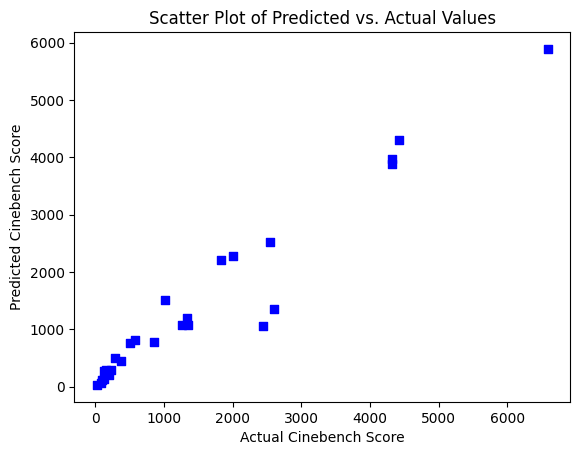

In [73]:
ax = plt.figure().add_subplot(111)

ax.scatter(y_test, y_pred, c='b', marker='s')
plt.xlabel("Actual Cinebench Score")
plt.ylabel("Predicted Cinebench Score")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

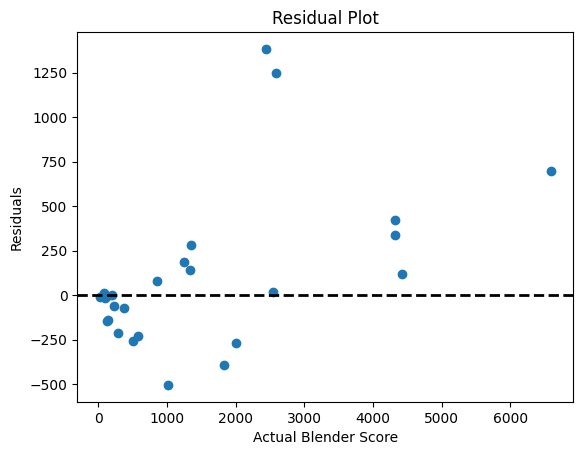

In [74]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual Blender Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

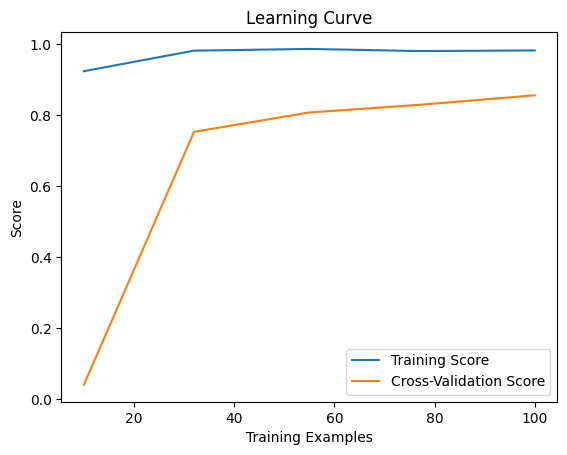

In [75]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [76]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

save_model(model, 'blender_predictor.pkl')